This Jupyter notebook provides an example on how to analyze Netlogo data with Python. It is based on Chris Davis' analysis of Netlogo data in R that can be found [here](https://cbdavis.github.io/Demo-Analyzing-Netlogo-Data-with-R/NetLogoDataDemo.html). In particular, we use the same data file.

In [1]:
#Load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [2]:
# We start by reading in the file generated by Netlogo's behaviorspace.
Basecase = pd.read_csv('Convenience-change-2.csv', skiprows=6, low_memory=False)
Basecasenormal = pd.read_csv('Convenience-change-2.csv', skiprows=6, low_memory=False)

In [3]:
# Rename two column names
Basecase.rename(columns={'Reuse-percentage-fixed':'Reused textiles consumed [%]','[run number]':'run_number','[step]':'tick', 'reuse-percentage-fixed':'Reuse-percentage'}, inplace=True)
Basecasenormal.rename(columns={'Reuse-percentage-fixed':'Reused textiles consumed [%]','[run number]':'run_number','[step]':'tick', 'reuse-percentage-fixed':'Reuse-percentage'}, inplace=True)
Basecasenormal['year']=Basecasenormal['tick'].div(365)

In [4]:
#Basecase["Rebound?"].replace("True", "Incorporated", inplace=True, regex=True)
#Basecasenormal["Rebound?"].replace("True", "Incorporated", inplace=True, regex=True)

In [5]:
Basecase.drop(Basecase[Basecase['tick'] < 5475].index, inplace = True)

Basecase['year1']=Basecase['tick'].div(365)
Basecase['year']=Basecase['year1']-23
Basecase[0:100]

,run_number,Possession-wears-average,Social-influence-radius,Random-seed?,Segment-influence,Rebound?,Seed,Social-influence-threshold,Price-influence,Yearly-textile-consumption-avg,...,service-lifespan,new-consumption,wears,owners,reused-textiles-percentage,textiles-in-closet,reused-textiles-average,new-textiles-average,year1,year
39762,8,77,10,False,5,True,590,5,5,35,...,3.343860,29.515473,21.811705,1.072639,7.263923,175.6,12.0,153.2,15.000000,-8.000000
39768,8,77,10,False,5,True,590,5,5,35,...,3.342557,29.523435,21.803348,1.072551,7.255139,175.8,12.0,153.4,15.002740,-7.997260
39776,8,77,10,False,5,True,590,5,5,35,...,3.338578,29.531393,21.777229,1.072551,7.255139,175.6,12.0,153.4,15.005479,-7.994521
39784,8,77,10,False,5,True,590,5,5,35,...,3.341318,29.525988,21.795246,1.072551,7.255139,175.6,12.0,153.4,15.008219,-7.991781
39790,8,77,10,False,5,True,590,5,5,35,...,3.346580,29.520586,21.802868,1.072639,7.263923,175.4,12.0,153.2,15.010959,-7.989041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40437,8,77,10,False,5,True,590,5,5,35,...,3.387695,29.502250,21.979682,1.071084,7.108434,176.8,11.8,154.2,15.260274,-7.739726
40445,8,77,10,False,5,True,590,5,5,35,...,3.387131,29.496940,21.963131,1.071170,7.117008,176.4,11.8,154.0,15.263014,-7.736986
40456,8,77,10,False,5,True,590,5,5,35,...,3.387315,29.504769,21.927995,1.072289,7.228916,176.6,12.0,154.0,15.265753,-7.734247
40465,8,77,10,False,5,True,590,5,5,35,...,3.390055,29.499460,21.945706,1.072289,7.228916,176.6,12.0,154.0,15.268493,-7.731507


In [12]:
Basecase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197500 entries, 39762 to 2744999
Data columns (total 43 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   run_number                         int64  
 1   Possession-wears-average           int64  
 2   Social-influence-radius            int64  
 3   Random-seed?                       bool   
 4   Segment-influence                  int64  
 5   Rebound?                           bool   
 6   Seed                               int64  
 7   Social-influence-threshold         int64  
 8   Price-influence                    int64  
 9   Yearly-textile-consumption-avg     int64  
 10  Possession-span-stdev              int64  
 11  Social-influence                   float64
 12  Disposal-feedback?                 bool   
 13  Number-consumers                   int64  
 14  Lifetime-decrease-reuse            int64  
 15  Value-change                       object 
 16  Scenario?     

In [13]:
Basecase['Reused textiles consumed [%]'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 39762      Current
39768      Current
39776      Current
39784      Current
39790      Current
            ...   
2744995    Current
2744996    Current
2744997    Current
2744998    Current
2744999    Current
Name: Reused textiles consumed [%], Length: 2197500, dtype: object>

In [14]:
check = np.linspace(start = 0, stop = 100, num = 100).astype(int)
Basecase_short = Basecase[Basecase['year'].isin(check)]
Basecasenormal_short = Basecasenormal[Basecasenormal['year'].isin(check)]

In [15]:
Basecase_melted = Basecase.melt(id_vars = ["reused-textiles-percentage", 'year'], value_vars = ['Value-of-price-modification', 'Value-of-environment-modification' ,'Value-of-convenience-modification'], var_name='Value-modification', value_name = 'reused_melted')
#Basecase_melted_short = Basecase_melted[Basecase_melted['year'].isin(check)]

In [16]:
Basecase_melted_short = Basecase_melted[Basecase_melted['year'].isin(check)]

In [17]:
display(Basecase_melted.head())

,reused-textiles-percentage,year,Value-modification,reused_melted
0,7.263923,-8.000000,Value-of-price-modification,0
1,7.255139,-7.997260,Value-of-price-modification,0
2,7.255139,-7.994521,Value-of-price-modification,0
3,7.255139,-7.991781,Value-of-price-modification,0
4,7.263923,-7.989041,Value-of-price-modification,0


In [18]:
Basecase['service-lifespan-1']=2*Basecase['service-lifespan']
Basecasenormal['service-lifespan-1']=2*Basecasenormal['service-lifespan']

Basecase['wears-1']=2*Basecase['wears']
Basecasenormal['wears-1']=2*Basecasenormal['wears']

# Short database

In [19]:
Basecasenormal_short['year'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
2743465    71.0
2743830    72.0
2744195    73.0
2744560    74.0
2744925    75.0
Name: year, Length: 7600, dtype: float64>

In [20]:
Basecasenormal_short['Value-of-convenience-modification'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0            0
1            0
2            0
3            0
4            0
          ... 
2743465    100
2743830    100
2744195    100
2744560    100
2744925    100
Name: Value-of-convenience-modification, Length: 7600, dtype: int64>

In [21]:
 hue_order = [-100, -75, -50, -25, 0], sort=False,

SyntaxError: cannot assign to operator (Temp/ipykernel_16908/1339707832.py, line 1)

In [22]:
Y_r = 'reused-textiles-percentage'
T_r = "Total reused textiles "
L_r = "Total reused textiles [%]"

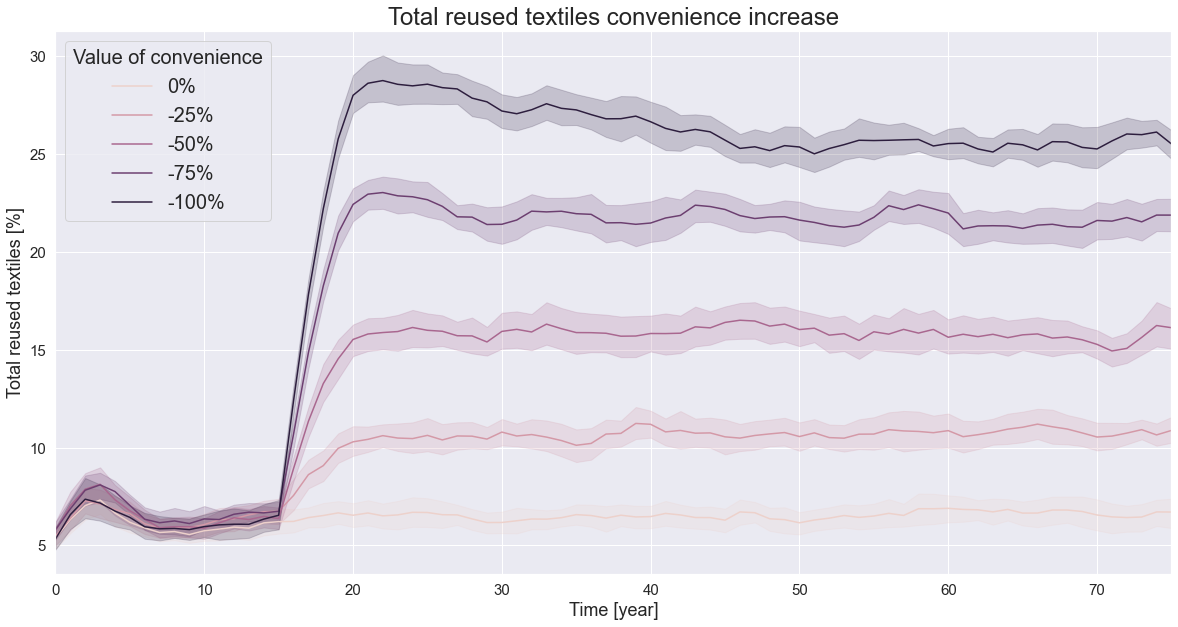

In [50]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = Y_r, hue = 'Value-of-convenience-modification', sort = False, ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel(L_r, fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 75)
plt.title(T_r + "convenience increase", fontsize = 24)
plt.legend(title = "Value of convenience", title_fontsize = 20, labels = ["0%", "-25%", "-50%", "-75%", "-100%"], fontsize=20)

In [42]:
Y_n = 'new-consumption'
T_n = "New textile consumption "
L_n = "New textile consumption [#/year]"

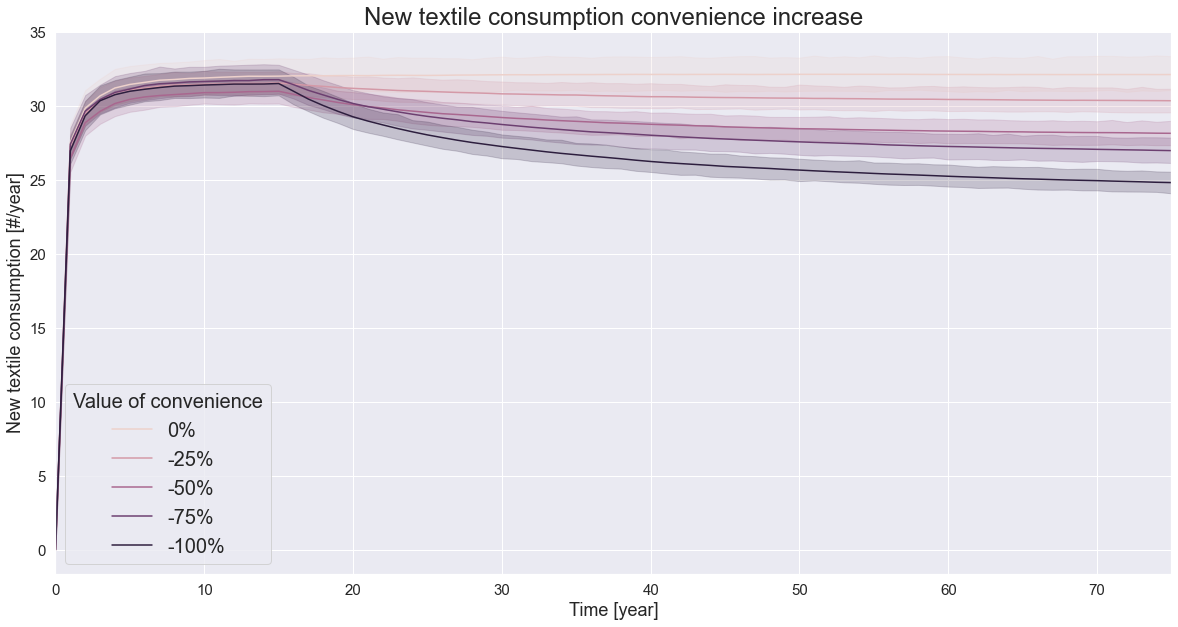

In [54]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = Y_n, hue = 'Value-of-convenience-modification', legend ='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel(L_n, fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 75)
plt.title(T_n + "convenience increase", fontsize = 24)
plt.legend(title = "Value of convenience", title_fontsize = 20, labels = ["0%", "-25%", "-50%", "-75%", "-100%"], fontsize=20)

In [23]:
Y_s = 'service-lifespan-1'
T_s = "Textile service lifespan "
L_s = "Textile service lifespan [years]"

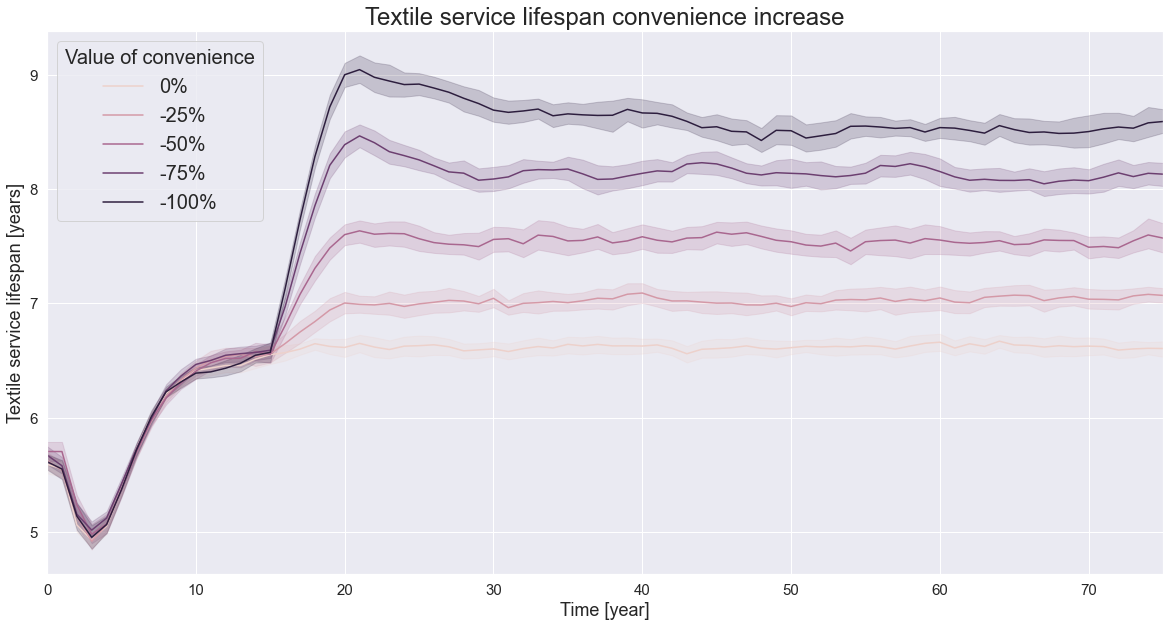

In [24]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = Y_s, hue = 'Value-of-convenience-modification', legend ='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel(L_s, fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 75)
plt.title( T_s + "convenience increase", fontsize = 24)
plt.legend(title = "Value of convenience", title_fontsize = 20, labels = ["0%", "-25%", "-50%", "-75%", "-100%"], fontsize=20)

In [57]:
Y_o = "owners"
T_o = "Number of owners "
L_o = "Number of owners"

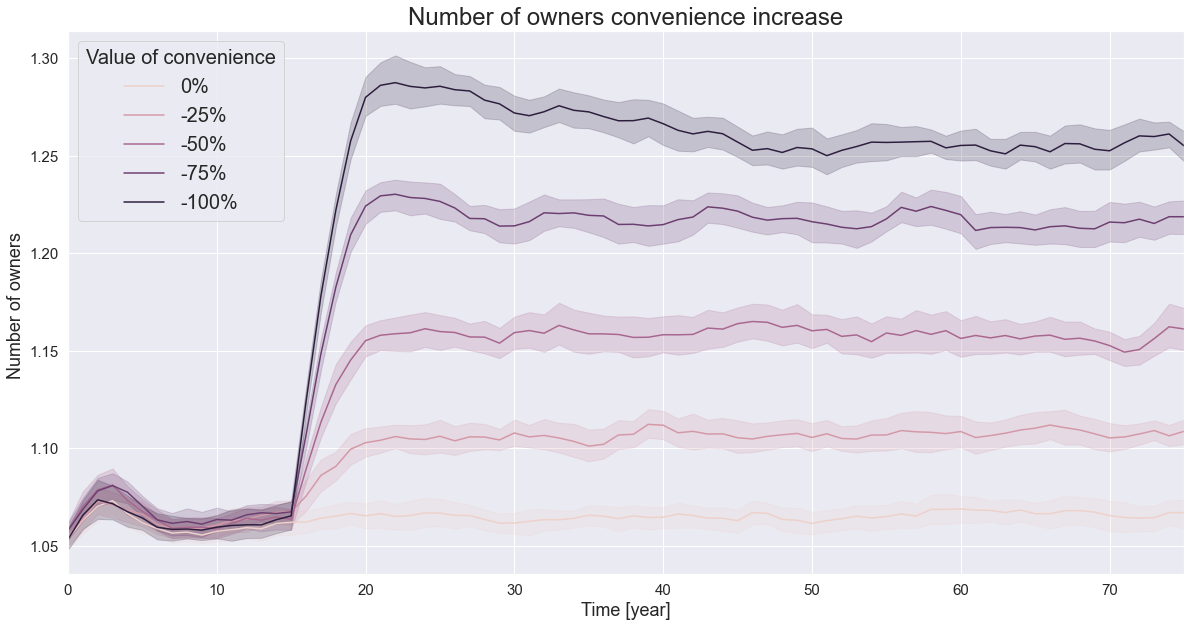

In [58]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = Y_o, hue = 'Value-of-convenience-modification', legend ='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel(T_o, fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 75)
plt.title( T_o + "convenience increase", fontsize = 24)
plt.legend(title = "Value of convenience", title_fontsize = 20, labels = ["0%", "-25%", "-50%", "-75%", "-100%"], fontsize=20)

In [25]:
Y_w = "wears-1"
T_w = "Number of wears "
L_w = "Number of wears"

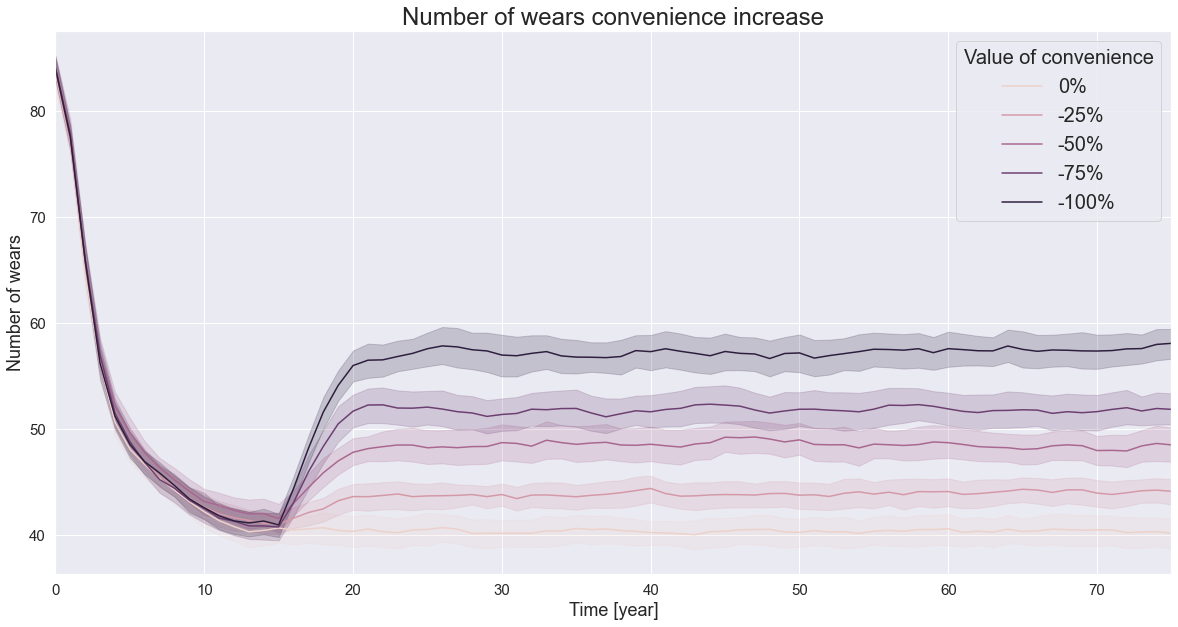

In [26]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = Y_w, hue = 'Value-of-convenience-modification', legend ='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel(L_w, fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 75)
plt.title( T_w + "convenience increase", fontsize = 24)
plt.legend(title = "Value of convenience", title_fontsize = 20, labels = ["0%", "-25%", "-50%", "-75%", "-100%"], fontsize=20)

# Figures not shortend

([<matplotlib.axis.XTick at 0x1f3ba24da00>,
 [Text(0, 0, '0%'),
  Text(1, 0, '-25%'),
  Text(2, 0, '-50%'),
  Text(3, 0, '-75%'),
  Text(4, 0, '-100%')])

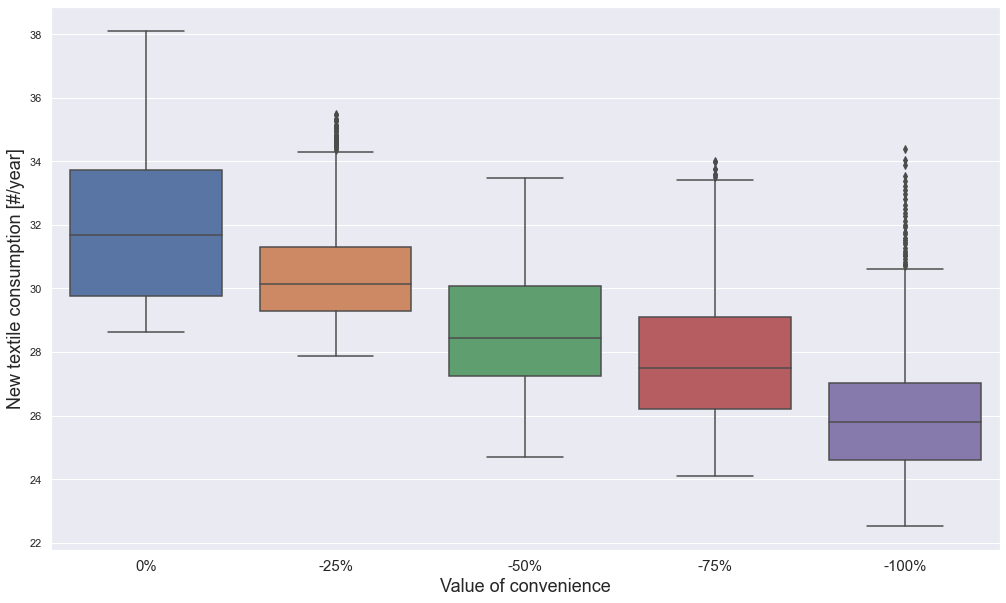

In [61]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bn = sns.boxplot(data=Basecase_short, y ='new-consumption', x = 'Value-of-convenience-modification')
plt.xlabel('Value of convenience', fontsize = 18)
plt.ylabel('New textile consumption [#/year]', fontsize=18)
plt.xticks(np.arange(5), labels = ["0%", "-25%", "-50%", "-75%", "-100%"], fontsize=15)


#legend_label = ["+ 0%", "+ 25%", "+ 50%", "+ 75%", "+ 100%"]
#bn.legend(title = "Value of price?")
#n = 0
#for i in legend_label:
#    bn.legend_.texts[n].set_text(i)
#    n += 1

#plt.setp(bn.get_legend().get_texts(), fontsize='18') # for legend text
##plt.setp(bn.get_legend().get_title(), fontsize='18') # for legend title

#plt.show()

([<matplotlib.axis.XTick at 0x2213b4f2940>,
 [Text(0, 0, '0%'),
  Text(1, 0, '-25%'),
  Text(2, 0, '-50%'),
  Text(3, 0, '-75%'),
  Text(4, 0, '-100%')])

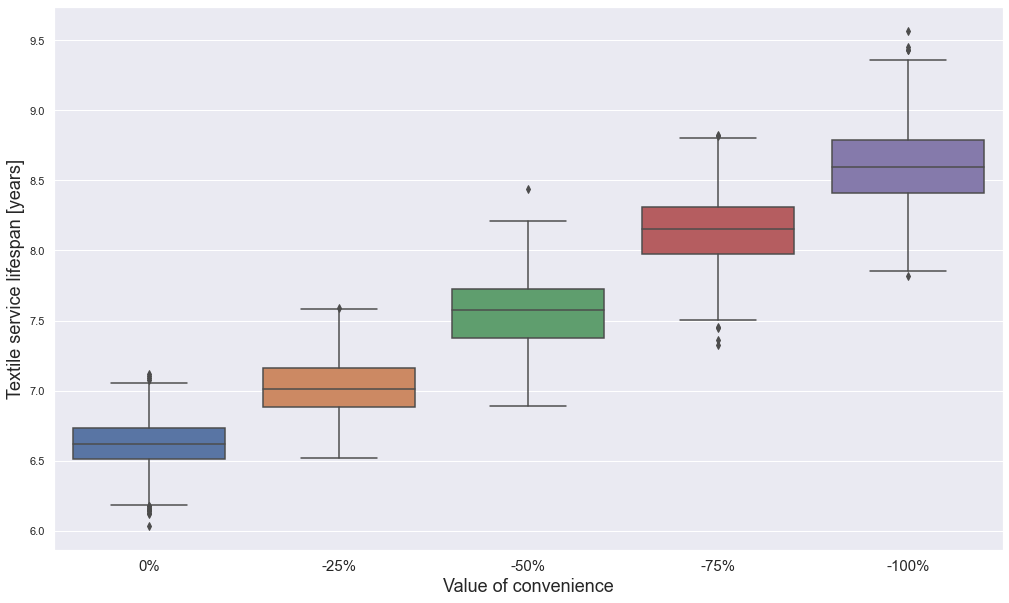

In [27]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bn = sns.boxplot(data=Basecase_short, y ='service-lifespan-1', x = 'Value-of-convenience-modification')
plt.xlabel('Value of convenience', fontsize = 18)
plt.ylabel('Textile service lifespan [years]', fontsize=18)
plt.xticks(np.arange(5), labels = ["0%", "-25%", "-50%", "-75%", "-100%"], fontsize=15)

([<matplotlib.axis.XTick at 0x2213b687be0>,
 [Text(0, 0, '0%'),
  Text(1, 0, '-25%'),
  Text(2, 0, '-50%'),
  Text(3, 0, '-75%'),
  Text(4, 0, '-100%')])

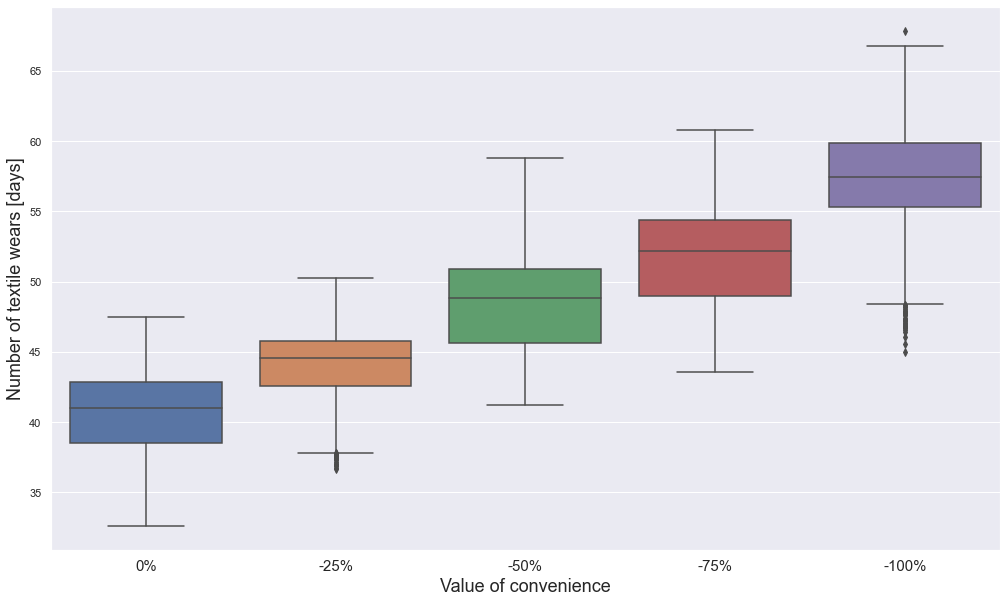

In [28]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bw = sns.boxplot(data=Basecase_short, y ='wears-1', x = 'Value-of-convenience-modification')
plt.xlabel('Value of convenience', fontsize = 18)
plt.ylabel('Number of textile wears [days]', fontsize=18)
plt.xticks(np.arange(5), labels = ["0%", "-25%", "-50%", "-75%", "-100%"], fontsize=15)

#legend_label = ["Not incorporated", "Incorporated"]
#bw.legend(title = "Rebound?")
#n = 0
#for i in legend_label:
#    bw.legend_.texts[n].set_text(i)
#    n += 1

#plt.setp(bw.get_legend().get_texts(), fontsize='18') # for legend text
#plt.setp(bw.get_legend().get_title(), fontsize='18') # for legend title

#plt.show()

([<matplotlib.axis.XTick at 0x1f3e1cd2160>,
 [Text(0, 0, '0%'),
  Text(1, 0, '-25%'),
  Text(2, 0, '-50%'),
  Text(3, 0, '-75%'),
  Text(4, 0, '-100%')])

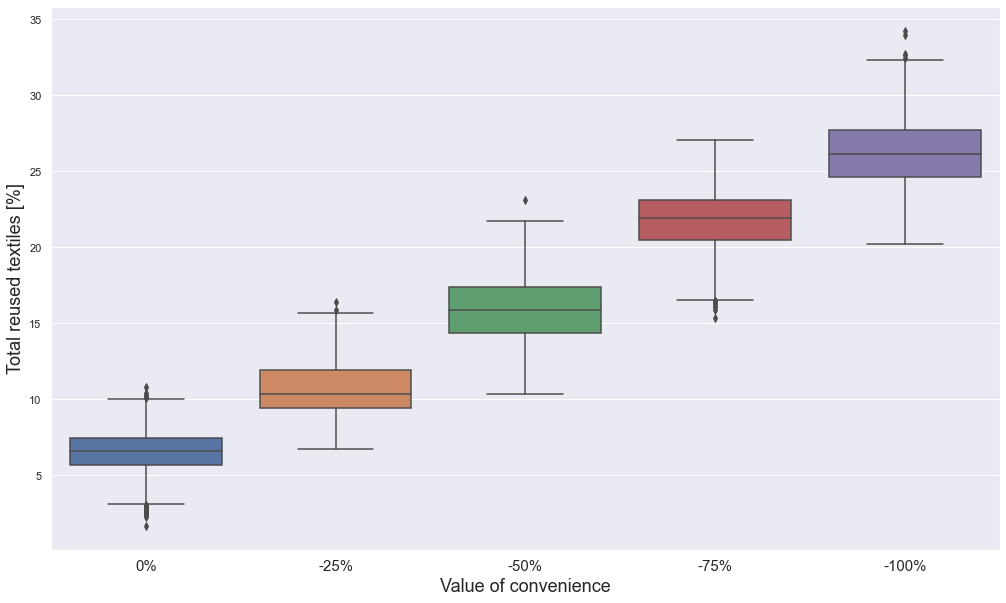

In [64]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bp = sns.boxplot(data=Basecase_short, y ='reused-textiles-percentage', x = 'Value-of-convenience-modification')
plt.ylabel('Total reused textiles [%]', fontsize=18)
plt.xlabel('Value of convenience', fontsize = 18)
plt.xticks(np.arange(5), labels = ["0%", "-25%", "-50%", "-75%", "-100%"], fontsize=15)

#legend_label = ["Not incorporated", "Incorporated"]
#bp.legend(title = "Rebound?")
#n = 0
#for i in legend_label:
#    bp.legend_.texts[n].set_text(i)
#    n += 1

#plt.setp(bp.get_legend().get_texts(), fontsize='18') # for legend text
#plt.setp(bp.get_legend().get_title(), fontsize='18') # for legend title

#plt.show()

([<matplotlib.axis.XTick at 0x1f3e2dfe6a0>,
 [Text(0, 0, '0%'),
  Text(1, 0, '-25%'),
  Text(2, 0, '-50%'),
  Text(3, 0, '-75%'),
  Text(4, 0, '-100%')])

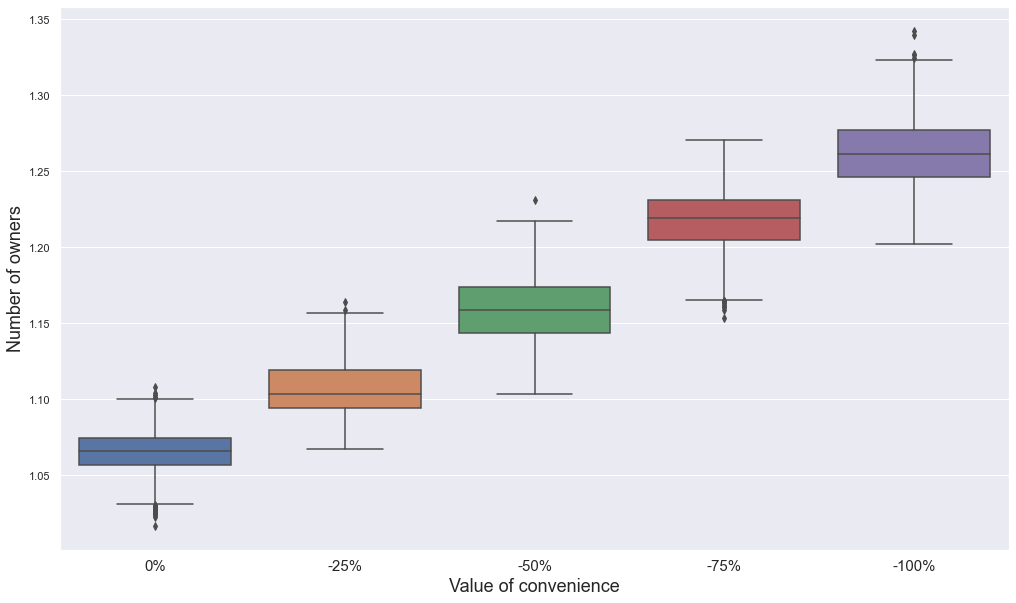

In [65]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
bo = sns.boxplot(data=Basecase_short, y ='owners', x = 'Value-of-convenience-modification')
plt.ylabel('Number of owners', fontsize=18)
plt.xlabel('Value of convenience', fontsize = 18)
plt.xticks(np.arange(5), labels = ["0%", "-25%", "-50%", "-75%", "-100%"], fontsize=15)

#legend_label = ["Not incorporated", "Incorporated"]
#bo.legend(title = "Rebound?")
#n = 0
#for i in legend_label:
#    bo.legend_.texts[n].set_text(i)
 #   n += 1

#plt.setp(bo.get_legend().get_texts(), fontsize='18') # for legend text
#plt.setp(bo.get_legend().get_title(), fontsize='18') # for legend title

#plt.show()